<a href="https://colab.research.google.com/github/Chizoruo/Data-Science-For-Beginners/blob/main/Dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Upload the Excel file
uploaded = files.upload()

# Read the uploaded Excel file into a DataFrame
file_name = next(iter(uploaded))
df = pd.read_excel(file_name)

# Display the first few rows of the DataFrame
df.head()


Saving complaints sample.xlsx to complaints sample (1).xlsx


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-12-05,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,In accordance with the Fair Credit Reporting A...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30040,None,Consent provided,Web,2023-12-05,Closed with non-monetary relief,Yes,NaN,7944397
1,2023-09-11,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,I joined BoA in XXXX of 2023. I received one S...,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,94804,None,Consent provided,Web,2023-09-11,Closed with non-monetary relief,Yes,NaN,7533401
2,2023-12-14,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Information belongs to someone else,Its an account on my Experian that doesnt belo...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,MI,48035,None,Consent provided,Web,2023-12-14,Closed with explanation,Yes,NaN,7996987
3,2022-05-17,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,Right now I am bothered! This is my last and f...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",LA,70124,None,Consent provided,Web,2022-05-17,Closed with non-monetary relief,Yes,NaN,5573153
4,2022-12-16,Mortgage,Conventional home mortgage,Trouble during payment process,None,My previous mortgage company had started a loa...,None,Mr. Cooper Group Inc.,WA,980XX,None,Consent provided,Web,2022-12-16,Closed with explanation,Yes,NaN,6327926


In [49]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [50]:
df.isnull().sum()

Date received                    0
Product                          0
Sub-product                      0
Issue                            0
Sub-issue                        0
Consumer complaint narrative     0
Company public response          0
Company                          0
State                            0
ZIP code                         0
Tags                             0
Consumer consent provided?       0
Submitted via                    0
Date sent to company             0
Company response to consumer     0
Timely response?                 0
Consumer disputed?              24
Complaint ID                     0
dtype: int64

In [51]:
# Assuming your DataFrame is named df

# List of columns to keep
columns_to_keep = ['Date received', 'Product', 'Issue', 'Consumer complaint narrative',
                   'Company', 'ZIP code', 'Consumer consent provided?', 'Submitted via',
                   'Date sent to company', 'Timely response?', 'Complaint ID']  # Add more columns as needed

# Keep only specified columns
df = df[columns_to_keep]



In [52]:
df['Consumer complaint narrative']

0     In accordance with the Fair Credit Reporting A...
1     I joined BoA in XXXX of 2023. I received one S...
2     Its an account on my Experian that doesnt belo...
3     Right now I am bothered! This is my last and f...
4     My previous mortgage company had started a loa...
5     I keep mailing dispute letters to Equifax and ...
6     On XX/XX/XXXX I noticed two hard inquires from...
7     CB INDIGO ( Bank ) XX/XX/2022 I just recently ...
8     In XX/XX/2022, a debt validation letter was se...
9     I had over draft fee wasnt correct from XXXX t...
10    Last week I spoke with XXXX an Executive Offic...
11    True testimony in a affidavit form I XXXX : XX...
12    I hope this message finds you well. I am writi...
13    They called me initially on XX/XX/XXXX stating...
14    I received an email notification my credit sco...
15    The following late payments are billing errors...
16    i have a few hard inquiries and small inquires...
17    In XX/XX/2022, a debt validation letter wa

In [53]:
import re

def clean_text(text):
    # Remove special characters, punctuations, numbers, and uppercase 'X'
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text.replace('XXXX', '').replace('XX', ''))
    # Convert to lowercase
    cleaned_text = cleaned_text.lower()
    return cleaned_text.strip()

# Apply cleaning to the 'Consumer complaint narrative' column
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(clean_text)
df['Consumer complaint narrative']


0     in accordance with the fair credit reporting a...
1     i joined boa in  of  i received one ssi paymen...
2     its an account on my experian that doesnt belo...
3     right now i am bothered this is my last and fi...
4     my previous mortgage company had started a loa...
5     i keep mailing dispute letters to equifax and ...
6     on  i noticed two hard inquires from a unknown...
7     cb indigo  bank   i just recently got off the ...
8     in  a debt validation letter was sent to      ...
9           i had over draft fee wasnt correct from  to
10    last week i spoke with  an executive office ca...
11    true testimony in a affidavit form i    secure...
12    i hope this message finds you well i am writin...
13    they called me initially on  stating that i ow...
14    i received an email notification my credit sco...
15    the following late payments are billing errors...
16    i have a few hard inquiries and small inquires...
17    in  a debt validation letter was sent to  

In [54]:
# Convert the 'Consumer complaint narrative' column to string type
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].astype(str)

# Verify the data type after conversion
print(df['Consumer complaint narrative'].dtype)


object


In [55]:
# Print unique values in the column
print(df['Consumer complaint narrative'].unique())


['in accordance with the fair credit reporting act the list of accounts below has violated my federally protected consumer rights to privacy and confidentiality under  usc  \n\naccount name'
 'i joined boa in  of  i received one ssi payment into my account and then switched to   around  i kept the account open but made no transactions i switched my ssi back to boa in  i then waited until my payday of  x'
 'its an account on my experian that doesnt belong to me i would like it remove immediately i am trying to buy a car this is affecting my way me buying a car'
 'right now i am bothered this is my last and final attempt to file a complaint in the  bureaus i have attempted to be patient  however it is hard to be patient when you feel that you are continually being overlooked by somebody i am a victim of id'
 'my previous mortgage company had started a loan modification with me in   and trial payments were made in   and  before my loan modification was finalized rightpath  took over my mo

In [56]:
# Print the length of each unique value in the column
for value in df['Consumer complaint narrative'].unique():
    print(len(value))


185
213
155
246
222
221
202
236
212
43
249
207
233
221
157
192
166
208
224
169
219
172
212
250


In [57]:

df

,Date received,Product,Issue,Consumer complaint narrative,Company,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Timely response?,Complaint ID
0,2023-12-05,Credit reporting or other personal consumer re...,Incorrect information on your report,in accordance with the fair credit reporting a...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",30040,Consent provided,Web,2023-12-05,Yes,7944397
1,2023-09-11,Checking or savings account,Managing an account,i joined boa in of i received one ssi paymen...,"BANK OF AMERICA, NATIONAL ASSOCIATION",94804,Consent provided,Web,2023-09-11,Yes,7533401
2,2023-12-14,Credit card,Incorrect information on your report,its an account on my experian that doesnt belo...,Experian Information Solutions Inc.,48035,Consent provided,Web,2023-12-14,Yes,7996987
3,2022-05-17,"Credit reporting, credit repair services, or o...",Incorrect information on your report,right now i am bothered this is my last and fi...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",70124,Consent provided,Web,2022-05-17,Yes,5573153
4,2022-12-16,Mortgage,Trouble during payment process,my previous mortgage company had started a loa...,Mr. Cooper Group Inc.,980XX,Consent provided,Web,2022-12-16,Yes,6327926
5,2023-06-20,"Credit reporting, credit repair services, or o...",Problem with a credit reporting company's inve...,i keep mailing dispute letters to equifax and ...,"EQUIFAX, INC.",919XX,Consent provided,Web,2023-06-20,Yes,7134583
6,2022-02-10,"Credit reporting, credit repair services, or o...",Improper use of your report,on i noticed two hard inquires from a unknown...,DELMAR FINANCIAL COMPANY,323XX,Consent provided,Web,2022-03-01,Yes,5207719
7,2022-02-09,"Credit reporting, credit repair services, or o...",Improper use of your report,cb indigo bank i just recently got off the ...,"Genesis FS Card Services, Inc.",60637,Consent provided,Web,2022-02-09,No,5202659
8,2023-01-10,"Credit reporting, credit repair services, or o...",Improper use of your report,in a debt validation letter was sent to ...,"EQUIFAX, INC.",XXXXX,Consent provided,Web,2023-01-10,Yes,6421002
9,2023-06-14,Checking or savings account,Managing an account,i had over draft fee wasnt correct from to,WELLS FARGO & COMPANY,77584,Consent provided,Web,2023-06-14,Yes,7117512


In [58]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
from nltk.tokenize import word_tokenize

df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(word_tokenize)
df['Consumer complaint narrative']


0     [in, accordance, with, the, fair, credit, repo...
1     [i, joined, boa, in, of, i, received, one, ssi...
2     [its, an, account, on, my, experian, that, doe...
3     [right, now, i, am, bothered, this, is, my, la...
4     [my, previous, mortgage, company, had, started...
5     [i, keep, mailing, dispute, letters, to, equif...
6     [on, i, noticed, two, hard, inquires, from, a,...
7     [cb, indigo, bank, i, just, recently, got, off...
8     [in, a, debt, validation, letter, was, sent, t...
9     [i, had, over, draft, fee, wasnt, correct, fro...
10    [last, week, i, spoke, with, an, executive, of...
11    [true, testimony, in, a, affidavit, form, i, s...
12    [i, hope, this, message, finds, you, well, i, ...
13    [they, called, me, initially, on, stating, tha...
14    [i, received, an, email, notification, my, cre...
15    [the, following, late, payments, are, billing,...
16    [i, have, a, few, hard, inquiries, and, small,...
17    [in, a, debt, validation, letter, was, sen

In [60]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [61]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df['Consumer complaint narrative']

0     [in, accordance, with, the, fair, credit, repo...
1     [i, joined, boa, in, of, i, received, one, ssi...
2     [it, an, account, on, my, experian, that, does...
3     [right, now, i, am, bothered, this, is, my, la...
4     [my, previous, mortgage, company, had, started...
5     [i, keep, mailing, dispute, letter, to, equifa...
6     [on, i, noticed, two, hard, inquires, from, a,...
7     [cb, indigo, bank, i, just, recently, got, off...
8     [in, a, debt, validation, letter, wa, sent, to...
9     [i, had, over, draft, fee, wasnt, correct, fro...
10    [last, week, i, spoke, with, an, executive, of...
11    [true, testimony, in, a, affidavit, form, i, s...
12    [i, hope, this, message, find, you, well, i, a...
13    [they, called, me, initially, on, stating, tha...
14    [i, received, an, email, notification, my, cre...
15    [the, following, late, payment, are, billing, ...
16    [i, have, a, few, hard, inquiry, and, small, i...
17    [in, a, debt, validation, letter, wa, sent

In [62]:
from nltk.corpus import stopwords

# Download stopwords dataset
import nltk
nltk.download('stopwords')

# Define stop words
stop_words = set(stopwords.words('english'))

# Remove stop words from the 'Consumer complaint narrative' column
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])

# Display the updated DataFrame
print(df['Consumer complaint narrative'])


0     [accordance, fair, credit, reporting, act, lis...
1     [joined, boa, received, one, ssi, payment, acc...
2     [account, experian, doesnt, belong, would, lik...
3     [right, bothered, last, final, attempt, file, ...
4     [previous, mortgage, company, started, loan, m...
5     [keep, mailing, dispute, letter, equifax, keep...
6     [noticed, two, hard, inquires, unknown, source...
7     [cb, indigo, bank, recently, got, phone, compa...
8     [debt, validation, letter, wa, sent, company, ...
9                          [draft, fee, wasnt, correct]
10    [last, week, spoke, executive, office, case, s...
11    [true, testimony, affidavit, form, secured, pa...
12    [hope, message, find, well, writing, seek, ass...
13    [called, initially, stating, owe, apartment, c...
14    [received, email, notification, credit, score,...
15    [following, late, payment, billing, error, acc...
16    [hard, inquiry, small, inquires, hoping, get, ...
17    [debt, validation, letter, wa, sent, compa

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
import re

# Remove leading and trailing whitespaces and non-alphanumeric characters from each word in the list
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(lambda x: [re.sub(r'\W+', '', word.strip()) for word in x])
df['Consumer complaint narrative']


0     [accordance, fair, credit, reporting, act, lis...
1     [joined, boa, received, one, ssi, payment, acc...
2     [account, experian, doesnt, belong, would, lik...
3     [right, bothered, last, final, attempt, file, ...
4     [previous, mortgage, company, started, loan, m...
5     [keep, mailing, dispute, letter, equifax, keep...
6     [noticed, two, hard, inquires, unknown, source...
7     [cb, indigo, bank, recently, got, phone, compa...
8     [debt, validation, letter, wa, sent, company, ...
9                          [draft, fee, wasnt, correct]
10    [last, week, spoke, executive, office, case, s...
11    [true, testimony, affidavit, form, secured, pa...
12    [hope, message, find, well, writing, seek, ass...
13    [called, initially, stating, owe, apartment, c...
14    [received, email, notification, credit, score,...
15    [following, late, payment, billing, error, acc...
16    [hard, inquiry, small, inquires, hoping, get, ...
17    [debt, validation, letter, wa, sent, compa

In [64]:
df

,Date received,Product,Issue,Consumer complaint narrative,Company,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Timely response?,Complaint ID
0,2023-12-05,Credit reporting or other personal consumer re...,Incorrect information on your report,"[accordance, fair, credit, reporting, act, lis...","TRANSUNION INTERMEDIATE HOLDINGS, INC.",30040,Consent provided,Web,2023-12-05,Yes,7944397
1,2023-09-11,Checking or savings account,Managing an account,"[joined, boa, received, one, ssi, payment, acc...","BANK OF AMERICA, NATIONAL ASSOCIATION",94804,Consent provided,Web,2023-09-11,Yes,7533401
2,2023-12-14,Credit card,Incorrect information on your report,"[account, experian, doesnt, belong, would, lik...",Experian Information Solutions Inc.,48035,Consent provided,Web,2023-12-14,Yes,7996987
3,2022-05-17,"Credit reporting, credit repair services, or o...",Incorrect information on your report,"[right, bothered, last, final, attempt, file, ...","TRANSUNION INTERMEDIATE HOLDINGS, INC.",70124,Consent provided,Web,2022-05-17,Yes,5573153
4,2022-12-16,Mortgage,Trouble during payment process,"[previous, mortgage, company, started, loan, m...",Mr. Cooper Group Inc.,980XX,Consent provided,Web,2022-12-16,Yes,6327926
5,2023-06-20,"Credit reporting, credit repair services, or o...",Problem with a credit reporting company's inve...,"[keep, mailing, dispute, letter, equifax, keep...","EQUIFAX, INC.",919XX,Consent provided,Web,2023-06-20,Yes,7134583
6,2022-02-10,"Credit reporting, credit repair services, or o...",Improper use of your report,"[noticed, two, hard, inquires, unknown, source...",DELMAR FINANCIAL COMPANY,323XX,Consent provided,Web,2022-03-01,Yes,5207719
7,2022-02-09,"Credit reporting, credit repair services, or o...",Improper use of your report,"[cb, indigo, bank, recently, got, phone, compa...","Genesis FS Card Services, Inc.",60637,Consent provided,Web,2022-02-09,No,5202659
8,2023-01-10,"Credit reporting, credit repair services, or o...",Improper use of your report,"[debt, validation, letter, wa, sent, company, ...","EQUIFAX, INC.",XXXXX,Consent provided,Web,2023-01-10,Yes,6421002
9,2023-06-14,Checking or savings account,Managing an account,"[draft, fee, wasnt, correct]",WELLS FARGO & COMPANY,77584,Consent provided,Web,2023-06-14,Yes,7117512


In [65]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()

In [66]:
import pandas as pd
import re

# Assuming 'Consumer complaint narrative' is the column name
def clean_text(text):
    if isinstance(text, list):
        # If the input is a list, join the elements into a single string
        text = ' '.join(text)
    # Remove square brackets and commas
    cleaned_text = re.sub(r'[\[\],]', '', text)
    # Remove extra spaces
    cleaned_text = ' '.join(cleaned_text.split())
    return cleaned_text

# Apply the cleaning function to the entire column
df1['Cleaned narrative'] = df1['Consumer complaint narrative'].apply(clean_text)

# Print the cleaned data
print(df1['Cleaned narrative'])

0     accordance fair credit reporting act list acco...
1     joined boa received one ssi payment account sw...
2     account experian doesnt belong would like remo...
3     right bothered last final attempt file complai...
4     previous mortgage company started loan modific...
5     keep mailing dispute letter equifax keep sendi...
6     noticed two hard inquires unknown source didnt...
7     cb indigo bank recently got phone company wont...
8     debt validation letter wa sent company respond...
9                               draft fee wasnt correct
10    last week spoke executive office case speciali...
11    true testimony affidavit form secured party cr...
12    hope message find well writing seek assistance...
13    called initially stating owe apartment complex...
14    received email notification credit score dropp...
15    following late payment billing error according...
16    hard inquiry small inquires hoping get tcompan...
17    debt validation letter wa sent company res

#TF-IDF/SVC

<ipython-input-95-f558ba547cdb>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(score)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricW

Invalid Score encountered
Invalid Score encountered
Invalid Score encountered
Invalid Score encountered
Invalid Score encountered
Model Accuracy: 0.40
                     precision    recall  f1-score   support

 Extremely Negative       0.40      1.00      0.57         2
    Highly Negative       0.00      0.00      0.00         2
Neutral or Positive       0.00      0.00      0.00         1

           accuracy                           0.40         5
          macro avg       0.13      0.33      0.19         5
       weighted avg       0.16      0.40      0.23         5



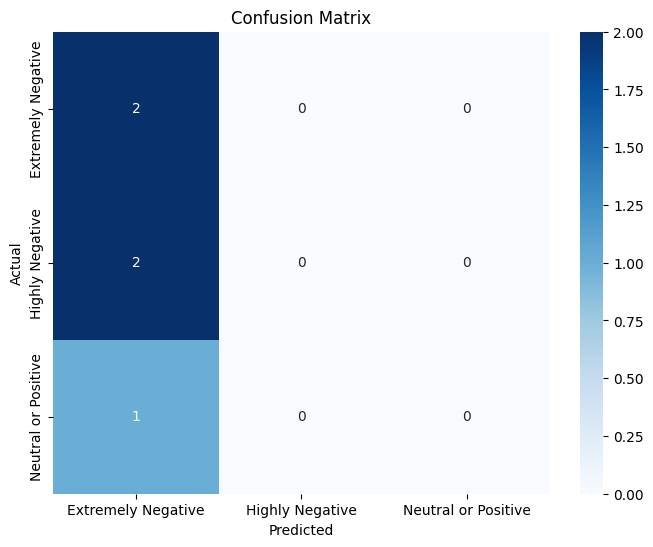

In [95]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def categorize_sentiment(score):
    try:
        score = float(score)
        if score > 0.015:
            return 'Extremely Negative'
        elif score > 0.012:
            return 'Highly Negative'
        elif score > 0.01:
            return 'Negative'
        elif score >= 0:
            return 'Neutral or Positive'
        else:
            return 'Invalid Score'
    except ValueError:
        print("Invalid Score encountered")  # Add this line to print the error
        return 'Invalid Score'

# Rest of the code remains the same...


# Step 1: Divide into Train and Test Data
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Step 2: Apply TF-IDF vectorization to train_data
documents_train = train_data['Consumer complaint narrative'].apply(lambda x: ' '.join(x))

# Check if there are any non-empty documents
if not any(documents_train):
    print("No non-empty documents found. Please check your data.")
else:
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(documents_train)

    # Step 3: Calculate sentiment scores for training data
    sentiment_scores_train = np.mean(X_train, axis=1)

    # Step 3 (continued): Categorize sentiment scores and create 'Sentiment' column for training data
    train_data['Sentiment_Score'] = sentiment_scores_train
    train_data['Sentiment_Label'] = [categorize_sentiment(score) for score in sentiment_scores_train]


    # Step 4: Train Machine Learning Model
    model = SVC()  # You can use your preferred classifier
    model.fit(X_train, train_data['Sentiment_Label'])

    # Step 5: Apply TF-IDF vectorization to test_data
    documents_test = test_data['Consumer complaint narrative'].apply(lambda x: ' '.join(x))
    X_test = vectorizer.transform(documents_test)

    # Step 6: Calculate sentiment scores for testing data using the trained model
    sentiment_scores_test = model.predict(X_test)

    # Step 6 (continued): Categorize sentiment scores and create 'Predicted_Sentiment' column for testing data
    test_data['Sentiment'] = ""
    test_data['Predicted_Sentiment'] = [categorize_sentiment(score) for score in sentiment_scores_test]

# Step 7 (continued): Calculate sentiment scores for test data
sentiment_scores_test = np.mean(X_test.toarray(), axis=1)

# Convert sentiment scores to valid numerical values
for i, score in enumerate(sentiment_scores_test):
    sentiment_scores_test[i] = float(score)  # Extract a single element from the array

# Create 'Sentiment_Score' and 'Sentiment_Label' columns for test data
test_data['Sentiment_Score'] = sentiment_scores_test
test_data['Sentiment_Label'] = [categorize_sentiment(score) for score in sentiment_scores_test]


# Evaluate model performance
y_pred = model.predict(X_test)
accuracy = accuracy_score(test_data['Sentiment_Label'], y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(test_data['Sentiment_Label'], y_pred))

# Print confusion matrix with heatmap
conf_matrix = confusion_matrix(test_data['Sentiment_Label'], y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [79]:
pip install tabulate

In [87]:
# Display tables for training and testing sets
print("Training Set:")
print(train_data.columns)  # Print column names for verification
train_table = train_data[['Sentiment_Score', 'Sentiment_Label', 'Consumer complaint narrative']]
print(tabulate(train_table, headers='keys', tablefmt='pretty'))

print("\nTesting Set:")
print(test_data.columns)  # Print column names for verification
test_table = test_data[['Sentiment_Score', 'Sentiment_Label', 'Consumer complaint narrative']]
print(tabulate(test_table, headers='keys', tablefmt='pretty'))





Training Set:
Index(['Date received', 'Product', 'Issue', 'Consumer complaint narrative',
       'Company', 'ZIP code', 'Consumer consent provided?', 'Submitted via',
       'Date sent to company', 'Timely response?', 'Complaint ID',
       'Sentiment_Score', 'Sentiment_Label'],
      dtype='object')
+----+----------------------+---------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|    |   Sentiment_Score    |   Sentiment_Label   |                                                                                                           Consumer complaint narrative                                                                                                            |
+----+----------------------+---------------------+-------------------------------------------------------

#BOW/Logistic Regression

In [90]:
df2

,Date received,Product,Issue,Consumer complaint narrative,Company,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Timely response?,Complaint ID
0,2023-12-05,Credit reporting or other personal consumer re...,Incorrect information on your report,"[accordance, fair, credit, reporting, act, lis...","TRANSUNION INTERMEDIATE HOLDINGS, INC.",30040,Consent provided,Web,2023-12-05,Yes,7944397
1,2023-09-11,Checking or savings account,Managing an account,"[joined, boa, received, one, ssi, payment, acc...","BANK OF AMERICA, NATIONAL ASSOCIATION",94804,Consent provided,Web,2023-09-11,Yes,7533401
2,2023-12-14,Credit card,Incorrect information on your report,"[account, experian, doesnt, belong, would, lik...",Experian Information Solutions Inc.,48035,Consent provided,Web,2023-12-14,Yes,7996987
3,2022-05-17,"Credit reporting, credit repair services, or o...",Incorrect information on your report,"[right, bothered, last, final, attempt, file, ...","TRANSUNION INTERMEDIATE HOLDINGS, INC.",70124,Consent provided,Web,2022-05-17,Yes,5573153
4,2022-12-16,Mortgage,Trouble during payment process,"[previous, mortgage, company, started, loan, m...",Mr. Cooper Group Inc.,980XX,Consent provided,Web,2022-12-16,Yes,6327926
5,2023-06-20,"Credit reporting, credit repair services, or o...",Problem with a credit reporting company's inve...,"[keep, mailing, dispute, letter, equifax, keep...","EQUIFAX, INC.",919XX,Consent provided,Web,2023-06-20,Yes,7134583
6,2022-02-10,"Credit reporting, credit repair services, or o...",Improper use of your report,"[noticed, two, hard, inquires, unknown, source...",DELMAR FINANCIAL COMPANY,323XX,Consent provided,Web,2022-03-01,Yes,5207719
7,2022-02-09,"Credit reporting, credit repair services, or o...",Improper use of your report,"[cb, indigo, bank, recently, got, phone, compa...","Genesis FS Card Services, Inc.",60637,Consent provided,Web,2022-02-09,No,5202659
8,2023-01-10,"Credit reporting, credit repair services, or o...",Improper use of your report,"[debt, validation, letter, wa, sent, company, ...","EQUIFAX, INC.",XXXXX,Consent provided,Web,2023-01-10,Yes,6421002
9,2023-06-14,Checking or savings account,Managing an account,"[draft, fee, wasnt, correct]",WELLS FARGO & COMPANY,77584,Consent provided,Web,2023-06-14,Yes,7117512


In [91]:
df2['Consumer complaint narrative']

0     [accordance, fair, credit, reporting, act, lis...
1     [joined, boa, received, one, ssi, payment, acc...
2     [account, experian, doesnt, belong, would, lik...
3     [right, bothered, last, final, attempt, file, ...
4     [previous, mortgage, company, started, loan, m...
5     [keep, mailing, dispute, letter, equifax, keep...
6     [noticed, two, hard, inquires, unknown, source...
7     [cb, indigo, bank, recently, got, phone, compa...
8     [debt, validation, letter, wa, sent, company, ...
9                          [draft, fee, wasnt, correct]
10    [last, week, spoke, executive, office, case, s...
11    [true, testimony, affidavit, form, secured, pa...
12    [hope, message, find, well, writing, seek, ass...
13    [called, initially, stating, owe, apartment, c...
14    [received, email, notification, credit, score,...
15    [following, late, payment, billing, error, acc...
16    [hard, inquiry, small, inquires, hoping, get, ...
17    [debt, validation, letter, wa, sent, compa

In [92]:
import pandas as pd
import re

# Assuming 'Consumer complaint narrative' is the column name
def clean_text(text):
    if isinstance(text, list):
        # If the input is a list, join the elements into a single string
        text = ' '.join(text)
    # Remove square brackets and commas
    cleaned_text = re.sub(r'[\[\],]', '', text)
    # Remove extra spaces
    cleaned_text = ' '.join(cleaned_text.split())
    return cleaned_text

# Apply the cleaning function to the entire column
df2['Cleaned narrative'] = df2['Consumer complaint narrative'].apply(clean_text)

# Print the cleaned data
print(df2['Cleaned narrative'])


0     accordance fair credit reporting act list acco...
1     joined boa received one ssi payment account sw...
2     account experian doesnt belong would like remo...
3     right bothered last final attempt file complai...
4     previous mortgage company started loan modific...
5     keep mailing dispute letter equifax keep sendi...
6     noticed two hard inquires unknown source didnt...
7     cb indigo bank recently got phone company wont...
8     debt validation letter wa sent company respond...
9                               draft fee wasnt correct
10    last week spoke executive office case speciali...
11    true testimony affidavit form secured party cr...
12    hope message find well writing seek assistance...
13    called initially stating owe apartment complex...
14    received email notification credit score dropp...
15    following late payment billing error according...
16    hard inquiry small inquires hoping get tcompan...
17    debt validation letter wa sent company res

Model Accuracy: 1.00
                 precision    recall  f1-score   support

Highly Negative       1.00      1.00      1.00         5

       accuracy                           1.00         5
      macro avg       1.00      1.00      1.00         5
   weighted avg       1.00      1.00      1.00         5

[[5]]


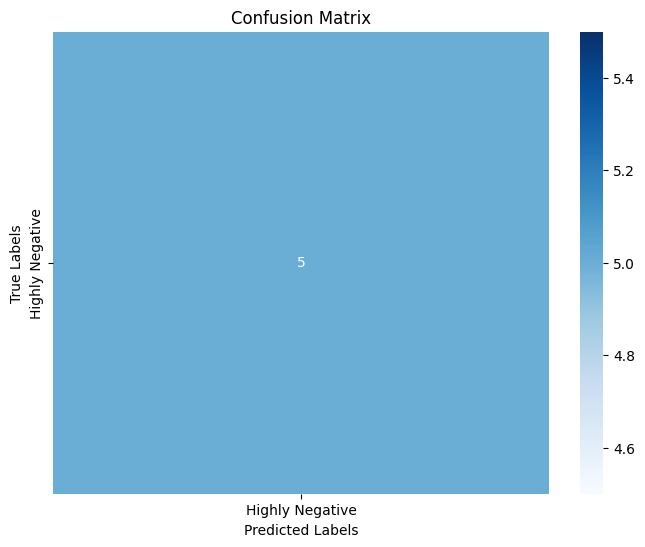

In [93]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.tokenize import word_tokenize

# Define the categorization function
def categorize_sentiment(score):
    if score > 0.8:
        return 'Highly Positive'
    elif score > 0.6:
        return 'Positive'
    elif score > 0.4:
        return 'Neutral'
    elif score > 0.2:
        return 'Negative'
    else:
        return 'Highly Negative'

# Step 1: Divide into Train and Test Data
train_data, test_data = train_test_split(df2, test_size=0.2, random_state=42)

# Step 2: Tokenize the text data
tokenized_train_data = [word_tokenize(text) for text in train_data['Cleaned narrative']]
tokenized_test_data = [word_tokenize(text) for text in test_data['Cleaned narrative']]

# Step 3: Apply Bag of Words (BoW) vectorization to train_data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform([" ".join(tokens) for tokens in tokenized_train_data])

# Step 4: Calculate sentiment scores for training data
sentiment_scores_train = np.mean(X_train.toarray(), axis=1)

# Step 4 (continued): Create 'Sentiment_Score' and 'Sentiment_Label' columns for training data
train_data['Sentiment_Score'] = sentiment_scores_train
train_data['Sentiment_Label'] = [categorize_sentiment(score) for score in sentiment_scores_train]

# Step 5: Train Random Forest Model
model = RandomForestClassifier()  # You can adjust hyperparameters or use a different classifier
model.fit(X_train, train_data['Sentiment_Label'])

# Step 6: Apply Bag of Words (BoW) vectorization to test_data
X_test = vectorizer.transform([" ".join(tokens) for tokens in tokenized_test_data])


# Step 7 (continued): Calculate sentiment scores for test data
sentiment_scores_test = np.mean(X_test.toarray(), axis=1)

# Step 7 (continued): Create 'Sentiment_Score' and 'Sentiment_Label' columns for test data
test_data['Sentiment_Score'] = sentiment_scores_test
test_data['Sentiment_Label'] = [categorize_sentiment(score) for score in sentiment_scores_test]

# Step 8: Evaluate model performance (e.g., accuracy, classification report, confusion matrix)
y_pred = model.predict(X_test)
accuracy = accuracy_score(test_data['Sentiment_Label'], y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Additional steps: You can analyze classification report and confusion matrix if needed
print(classification_report(test_data['Sentiment_Label'], y_pred))
print(confusion_matrix(test_data['Sentiment_Label'], y_pred))


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_true' is the true labels and 'y_pred' is the predicted labels
conf_matrix = confusion_matrix(test_data['Sentiment_Label'], y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [39]:
pip install tabulate


In [94]:
from tabulate import tabulate

# Display the tables using Tabulate
print("Training Set:")
print(tabulate(train_data[['Consumer complaint narrative', 'Sentiment_Score', 'Sentiment_Label']], headers='keys', tablefmt='pretty'))

print("\nTesting Set:")
print(tabulate(test_data[['Consumer complaint narrative', 'Sentiment_Score', 'Sentiment_Label']], headers='keys', tablefmt='pretty'))



Training Set:
+----+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------+-----------------+
|    |                                                                                                           Consumer complaint narrative                                                                                                            |   Sentiment_Score   | Sentiment_Label |
+----+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------+-----------------+
| 9  |                                                                                                       ['dr